In [1]:
#Package import
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas_datareader
import pandas_datareader.data as data
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Set end date to be 3 years ago, then pull SPY closing data from Yahoo finance
end_date = datetime.today()
start_date = datetime.today() - timedelta(days=1095)
stock = data.get_data_yahoo('SPY', start_date, end_date)


In [3]:
#Get the daily percent change in SPY
stock['Prev_Close']=stock['Close'].shift(1)
stock['Pct_Change'] = (stock['Close']-stock['Prev_Close'])/stock['Prev_Close']
stock

,High,Low,Open,Close,Volume,Adj Close,Prev_Close,Pct_Change
Date,,,,,,,,
2017-11-24,260.480011,260.160004,260.320007,260.359985,27856500.0,245.953445,NaN,NaN
2017-11-27,260.750000,260.000000,260.410004,260.230011,52274900.0,245.830704,260.359985,-0.000499
2017-11-28,262.899994,260.649994,260.760010,262.869995,98971700.0,248.324600,260.230011,0.010145
2017-11-29,263.630005,262.200012,263.019989,262.709991,77512100.0,248.173416,262.869995,-0.000609
2017-11-30,266.049988,263.670013,263.760010,265.010010,127894400.0,250.346207,262.709991,0.008755
...,...,...,...,...,...,...,...,...
2020-11-16,362.779999,359.589996,360.980011,362.570007,74541100.0,362.570007,358.100006,0.012483
2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,362.570007,-0.005378
2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,360.619995,-0.012035


In [4]:
#Read in DIX data, the file must be updated manually in the filesystem
dix = pd.read_csv('DIX.csv', sep=',')
dix

,date,price,dix,gex
0,2011-05-02,1361.219971,0.378842,1.897313e+09
1,2011-05-03,1356.619995,0.383411,1.859731e+09
2,2011-05-04,1347.319946,0.392122,1.717764e+09
3,2011-05-05,1335.099976,0.405457,1.361864e+09
4,2011-05-06,1340.199951,0.418649,1.490329e+09
...,...,...,...,...
2403,2020-11-16,3626.910000,0.414971,5.568672e+09
2404,2020-11-17,3609.530000,0.440556,5.804662e+09
2405,2020-11-18,3567.800000,0.416999,3.498179e+09
2406,2020-11-19,3581.850000,0.438597,5.497968e+09


In [5]:
#Merge DIX and SPY closing data
stock = stock.reset_index(drop=False)
stock['Date'] = stock['Date'].astype('datetime64')
dix['date'] = dix['date'].astype('datetime64')
dix = dix.merge(stock, left_on='date', right_on='Date', how='left')
dix = dix.dropna()
dix

,date,price,dix,gex,Date,High,Low,Open,Close,Volume,Adj Close,Prev_Close,Pct_Change
1655,2017-11-27,2601.42,0.360859,3.824848e+09,2017-11-27,260.750000,260.000000,260.410004,260.230011,52274900.0,245.830704,260.359985,-0.000499
1656,2017-11-28,2627.04,0.340461,4.415708e+09,2017-11-28,262.899994,260.649994,260.760010,262.869995,98971700.0,248.324600,260.230011,0.010145
1657,2017-11-29,2626.07,0.346608,3.077547e+09,2017-11-29,263.630005,262.200012,263.019989,262.709991,77512100.0,248.173416,262.869995,-0.000609
1658,2017-11-30,2647.58,0.350456,4.005437e+09,2017-11-30,266.049988,263.670013,263.760010,265.010010,127894400.0,250.346207,262.709991,0.008755
1659,2017-12-01,2642.18,0.384371,3.565285e+09,2017-12-01,265.309998,260.760010,264.760010,264.459991,164390900.0,249.826630,265.010010,-0.002075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,2020-11-16,3626.91,0.414971,5.568672e+09,2020-11-16,362.779999,359.589996,360.980011,362.570007,74541100.0,362.570007,358.100006,0.012483
2404,2020-11-17,3609.53,0.440556,5.804662e+09,2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,362.570007,-0.005378
2405,2020-11-18,3567.80,0.416999,3.498179e+09,2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,360.619995,-0.012035
2406,2020-11-19,3581.85,0.438597,5.497968e+09,2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,356.279999,0.004210


In [6]:
#Calculate relativities
dix['Pct_Rel'] = dix['Pct_Change']/dix['Pct_Change'].median()
dix['Dix_Rel'] = dix['dix']/dix['dix'].median()
dix['Gex_Rel'] = dix['gex']/dix['gex'].median()

dix

,date,price,dix,gex,Date,High,Low,Open,Close,Volume,Adj Close,Prev_Close,Pct_Change,Pct_Rel,Dix_Rel,Gex_Rel
1655,2017-11-27,2601.42,0.360859,3.824848e+09,2017-11-27,260.750000,260.000000,260.410004,260.230011,52274900.0,245.830704,260.359985,-0.000499,-0.531779,0.857330,1.359721
1656,2017-11-28,2627.04,0.340461,4.415708e+09,2017-11-28,262.899994,260.649994,260.760010,262.869995,98971700.0,248.324600,260.230011,0.010145,10.806658,0.808870,1.569769
1657,2017-11-29,2626.07,0.346608,3.077547e+09,2017-11-29,263.630005,262.200012,263.019989,262.709991,77512100.0,248.173416,262.869995,-0.000609,-0.648390,0.823473,1.094058
1658,2017-11-30,2647.58,0.350456,4.005437e+09,2017-11-30,266.049988,263.670013,263.760010,265.010010,127894400.0,250.346207,262.709991,0.008755,9.326145,0.832616,1.423920
1659,2017-12-01,2642.18,0.384371,3.565285e+09,2017-12-01,265.309998,260.760010,264.760010,264.459991,164390900.0,249.826630,265.010010,-0.002075,-2.210866,0.913190,1.267447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,2020-11-16,3626.91,0.414971,5.568672e+09,2020-11-16,362.779999,359.589996,360.980011,362.570007,74541100.0,362.570007,358.100006,0.012483,13.296911,0.985890,1.979645
2404,2020-11-17,3609.53,0.440556,5.804662e+09,2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,362.570007,-0.005378,-5.729186,1.046674,2.063538
2405,2020-11-18,3567.80,0.416999,3.498179e+09,2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,360.619995,-0.012035,-12.819970,0.990708,1.243591
2406,2020-11-19,3581.85,0.438597,5.497968e+09,2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,356.279999,0.004210,4.484843,1.042021,1.954510


This shows a relativity. This is calculated as gex / median gex since 8-29-17. The median gex is:2812965624.015


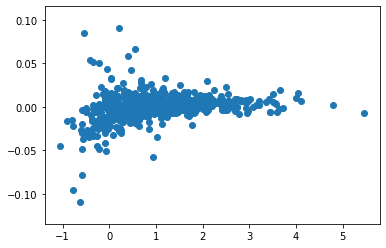

In [7]:
#Output some graphs showing relationship between GEX DIX and Pct Change
print('This shows a relativity. This is calculated as gex / median gex since 8-29-17. The median gex is:' + str(dix['gex'].median()))

plt.scatter(dix['Gex_Rel'],dix['Pct_Change'])

plt.show()

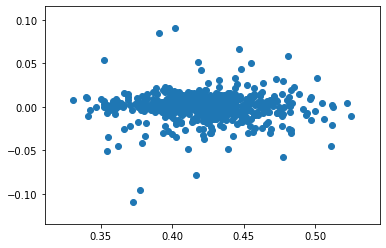

In [8]:
plt.scatter(dix['dix'],dix['Pct_Change'])
plt.show()

In [9]:
print(dix['dix'].median())
print(dix['gex'].median())

0.4209100953341571
2812965624.015


In [10]:
dix['Gex_Rel'].std()

0.8995766228695906

In [11]:
dix['Gex_Rel'].count()

753

In [12]:
#Bread and butter here, this is the report I post on Reddit
#We get a range of GEX relativities within a 99% confidence inverval, e.g. 2.576 * margin of error(Gex_Rel)
gex_moe = 2.576 * dix['Gex_Rel'].std()/(dix['Gex_Rel'].count()**.5)
gex_min = dix.iloc[-1]['Gex_Rel'] - gex_moe
gex_max = dix.iloc[-1]['Gex_Rel'] + gex_moe

#Subset data to be within the Gex Rel range and calculate count, mean change, and STD dev
count_total = dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min)]['Pct_Change'].count()
mean_change = abs(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min)]['Pct_Change']).mean()
std_change = abs(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min)]['Pct_Change']).std()

#Calculate 95% confidence interval
moe = 1.96 * std_change/count_total**.5
low_conf = mean_change - moe
high_conf = mean_change + moe

#Print the report
print('Gex Rel Print: '+ str(round(dix.iloc[-1]['Gex_Rel'],2)))
print('Dix Rel Print: '+ str(round(dix.iloc[-1]['Dix_Rel'],2)))
print('Gex Rel Range for Analysis: ' + str(round(gex_min,2)) + ' to ' + str(round(gex_max,2)))
print('Count: ' + str(count_total))
print('Mean Absolute Change: {:.2%}'.format(round(mean_change,4)))
print('Standard Deviation: {:.2%}'.format(round(std_change,4)))
print('95% confidence interval: (' + '{:.2%}'.format(low_conf) + ', '+ '{:.2%}'.format(high_conf) + ')')
print('Count Green: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] > 0)]['Pct_Change'].count()))
print('Count Red: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] < 0)]['Pct_Change'].count()))

#Print further lines relating to Dix above/below median
if (dix.iloc[-1]['Dix_Rel'] > 1.00):
    print('Count Green with Dix Above Median: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] > 0) & (dix['Dix_Rel'] > 1) ]['Pct_Change'].count()))
    print('Count Red with Dix Above Median: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] < 0) & (dix['Dix_Rel'] > 1)]['Pct_Change'].count()))
    print('Mean Green Change with Dix Above Median: '+ '{:.2%}'.format(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] > 0) & (dix['Dix_Rel'] > 1) ]['Pct_Change'].mean()))
    print('Mean Red Change with Dix Above Median: '+ '{:.2%}'.format(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] < 0) & (dix['Dix_Rel'] > 1) ]['Pct_Change'].mean()))
    
else:
    print('Count Green with Dix Below Median: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] > 0) & (dix['Dix_Rel'] < 1) ]['Pct_Change'].count()))
    print('Count Red with Dix Below Median: '+ str(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] < 0) & (dix['Dix_Rel'] < 1)]['Pct_Change'].count()))
    print('Mean Green Change with Dix Below Median: '+ '{:.2%}'.format(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] > 0) & (dix['Dix_Rel'] < 1) ]['Pct_Change'].mean()))
    print('Mean Red Change with Dix Below Median: '+ '{:.2%}'.format(dix[(dix['Gex_Rel']<gex_max) & (dix['Gex_Rel']>gex_min) & (dix['Pct_Change'] < 0) & (dix['Dix_Rel'] < 1) ]['Pct_Change'].mean()))

Gex Rel Print: 0.83
Dix Rel Print: 1.04
Gex Rel Range for Analysis: 0.74 to 0.91
Count: 63
Mean Absolute Change: 0.63%
Standard Deviation: 0.57%
95% confidence interval: (0.49%, 0.77%)
Count Green: 33
Count Red: 30
Count Green with Dix Above Median: 14
Count Red with Dix Above Median: 20
Mean Green Change with Dix Above Median: 0.88%
Mean Red Change with Dix Above Median: -0.63%


In [13]:
#Backtest for GEX absolute change effectiveness
for index, row in dix.iterrows():
    dix.loc[index, 'mean_change'] = abs(dix[(dix['Gex_Rel']<row['Gex_Rel'] + gex_moe) & (dix['Gex_Rel']>row['Gex_Rel'] - gex_moe)]['Pct_Change']).mean()
dix   

,date,price,dix,gex,Date,High,Low,Open,Close,Volume,Adj Close,Prev_Close,Pct_Change,Pct_Rel,Dix_Rel,Gex_Rel,mean_change
1655,2017-11-27,2601.42,0.360859,3.824848e+09,2017-11-27,260.750000,260.000000,260.410004,260.230011,52274900.0,245.830704,260.359985,-0.000499,-0.531779,0.857330,1.359721,0.005234
1656,2017-11-28,2627.04,0.340461,4.415708e+09,2017-11-28,262.899994,260.649994,260.760010,262.869995,98971700.0,248.324600,260.230011,0.010145,10.806658,0.808870,1.569769,0.005285
1657,2017-11-29,2626.07,0.346608,3.077547e+09,2017-11-29,263.630005,262.200012,263.019989,262.709991,77512100.0,248.173416,262.869995,-0.000609,-0.648390,0.823473,1.094058,0.005688
1658,2017-11-30,2647.58,0.350456,4.005437e+09,2017-11-30,266.049988,263.670013,263.760010,265.010010,127894400.0,250.346207,262.709991,0.008755,9.326145,0.832616,1.423920,0.005675
1659,2017-12-01,2642.18,0.384371,3.565285e+09,2017-12-01,265.309998,260.760010,264.760010,264.459991,164390900.0,249.826630,265.010010,-0.002075,-2.210866,0.913190,1.267447,0.005548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,2020-11-16,3626.91,0.414971,5.568672e+09,2020-11-16,362.779999,359.589996,360.980011,362.570007,74541100.0,362.570007,358.100006,0.012483,13.296911,0.985890,1.979645,0.006359
2404,2020-11-17,3609.53,0.440556,5.804662e+09,2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,362.570007,-0.005378,-5.729186,1.046674,2.063538,0.006966
2405,2020-11-18,3567.80,0.416999,3.498179e+09,2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,360.619995,-0.012035,-12.819970,0.990708,1.243591,0.004851
2406,2020-11-19,3581.85,0.438597,5.497968e+09,2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,356.279999,0.004210,4.484843,1.042021,1.954510,0.005527


0.006041405787946237
0.008795372662488914


X:\Conda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
X:\Conda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
X:\Conda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


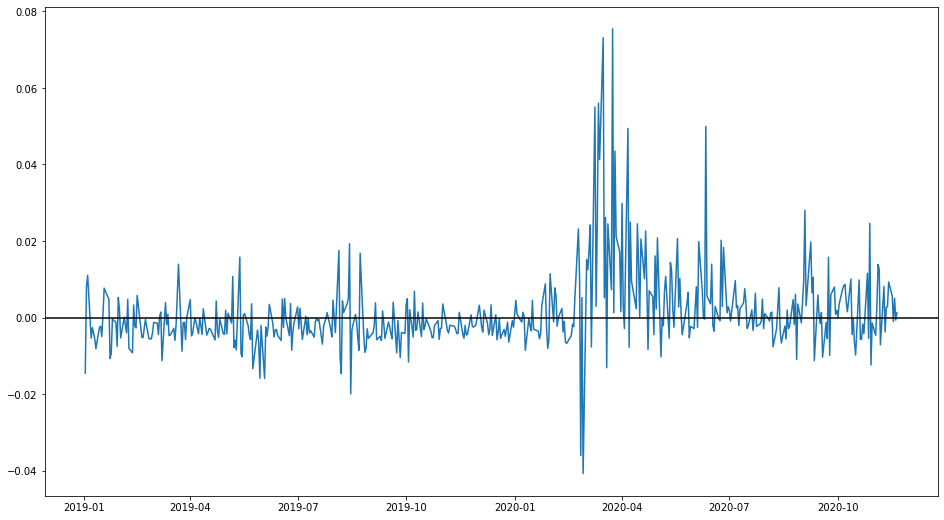

Mean miss since 01/01/2019: 0.0011


In [14]:
dix['off_by'] = abs(dix['Pct_Change'])-dix['mean_change'].shift(1)
dix['off_by_pct'] = (dix['mean_change'].shift(1)-abs(dix['Pct_Change']))/abs(dix['Pct_Change'])

print(abs(dix['off_by']).mean())
print(abs(dix['Pct_Change']).mean())

dix[['date', 'Pct_Change', 'mean_change', 'off_by']]

fig, ax1 = plt.subplots(figsize=(16,9))

ax1.plot(dix[dix['date']>'2019-01-01']['date'], dix[dix['date']>'2019-01-01']['off_by'], label='SPY abs change', color='tab:blue')

ax1.axhline(0,color='black')

plt.show()

print('Mean miss since 01/01/2019: '+str(round((dix[dix['date']>'2019-01-01']['off_by']).mean(),4)))

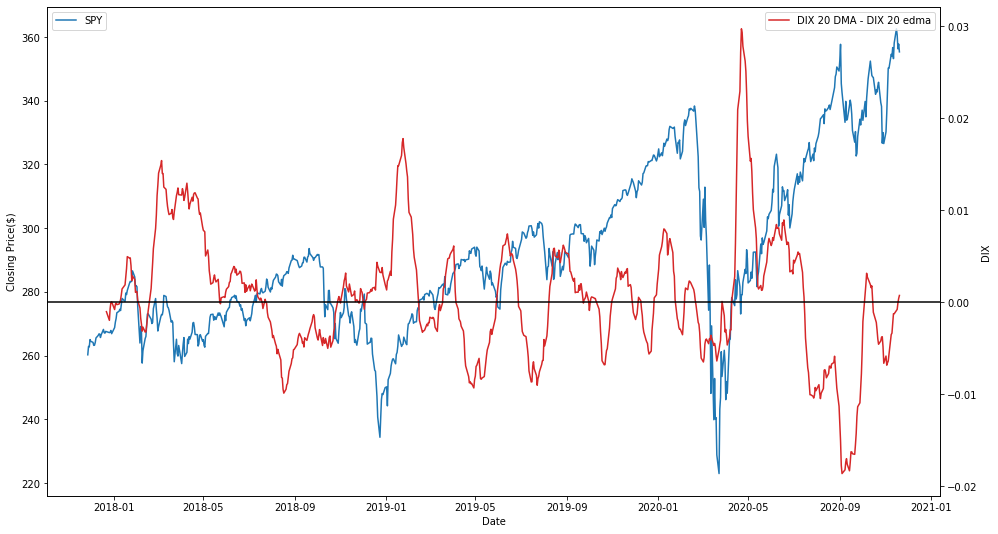

In [15]:
dix['dix_rolling'] = dix['dix'].rolling(20).mean()
dix['dix_rolling_e'] = dix['dix'].ewm(20).mean()

fig, ax1 = plt.subplots(figsize=(16,9))

ax1.plot(dix['date'], dix['Close'], label='SPY')


ax2 = ax1.twinx()
ax2.plot(dix['date'], dix['dix_rolling']-dix['dix_rolling_e'], label = 'DIX 20 DMA - DIX 20 edma', color='tab:red')
#ax2.plot(dix_copy['date'], dix_copy['dix_rolling_e'], label = 'DIX 9 dema', color='tab:purple')

ax2.axhline(0,color='black')

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price($)')
ax2.set_ylabel('DIX')
ax1.legend()
ax2.legend()

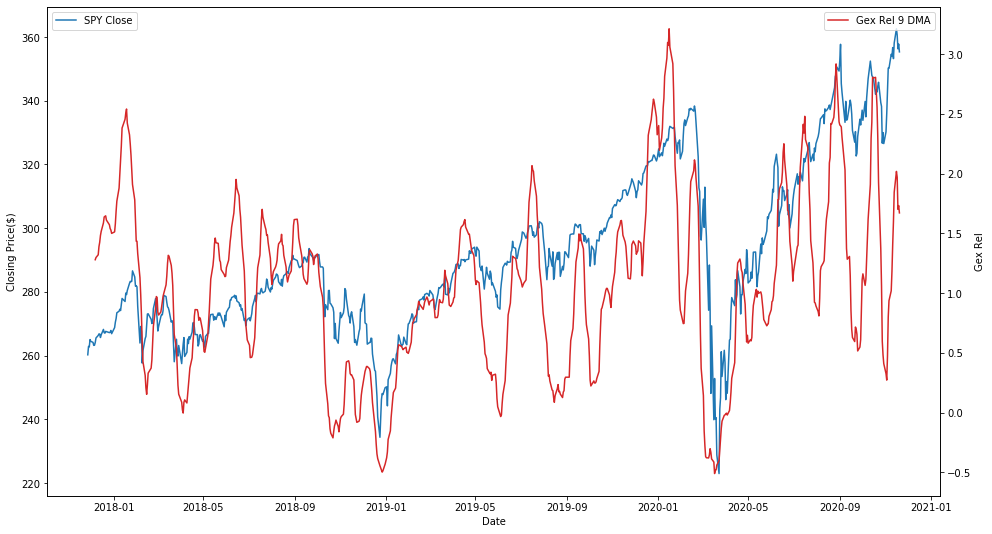

In [16]:
dix['Close_Rolling'] = dix['Close'].rolling(9).mean()
dix['gex_rolling'] = dix['Gex_Rel'].rolling(9).mean()

fig, ax1 = plt.subplots(figsize=(16,9))


ax2 = ax1.twinx()
ax2.plot(dix['date'], dix['gex_rolling'], label = 'Gex Rel 9 DMA', color='tab:red')
ax1.plot(dix['date'], dix['Close'], label='SPY Close', color='tab:blue')
#ax2.plot(dix_copy['date'], dix_copy['dix_rolling_e'], label = 'DIX 9 dema', color='tab:purple')

#ax2.axhline(0,color='black')

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price($)')
ax2.set_ylabel('Gex Rel')
ax1.legend()
ax2.legend()